In [1]:
import random

import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
from utils import random_walk, walk_stats, catalan_number, full_histogram
import pandas as pd
from tqdm.notebook import tqdm
import markov as mkv
from statistics import mean
import seaborn as sns
from sympy import Matrix

In [ ]:
cs = range(1,301, 10)
n = 100
y = []
x = []
for cc in tqdm(cs):
    c = round((cc-1)/100, 3)
    g = ig.Graph.Erdos_Renyi(n, p=c / n)
    plt.figure(figsize=(10, 10))
    layout = g.layout_fruchterman_reingold()
    ax = plt.subplot(111)
    plt.axis('off')
    plt.title(f'$c = {c}$', fontsize=30)
    ig.plot(g, target=ax, layout=layout, vertex_color='blue', vertex_size=10, edge_width=5)
    # plt.subplot(122)
    # y.append(g.clusters().giant().vcount()/n)
    # x.append(c)
    # plt.plot(x, y, 'or', markersize=5)
    # plt.ylim(0,1)
    # plt.xlim(0,3)
    plt.grid()
    # plt.title('Giant component size', fontsize=30)
    # plt.xlabel('$c$', fontsize=30)
    # plt.ylabel('$Size$', fontsize=30)
    plt.savefig(f'./figures/new/{cc:03}.png')
    plt.close()

  0%|          | 0/30 [00:00<?, ?it/s]

In [1]:
# g = ig.Graph.Erdos_Renyi(6, p=0.5)
n = 3
g = ig.Graph.Tree_Game(n, method='prufer')
_, ax = plt.subplots(figsize=(5, 5))
ig.plot(g, target=ax, vertex_label=[str(v.index+1) for v in g.vs], vertex_label_size=20)
plt.grid()
plt.axis('off')

l = random.choice([v.index for v in g.vs if v.degree() == 1])
T = mkv.get_punctured_transition_matrix(g, l)
W = Matrix(T)
print(l+1)
print(W.is_diagonalizable())

NameError: name 'ig' is not defined

In [2]:
W

NameError: name 'W' is not defined

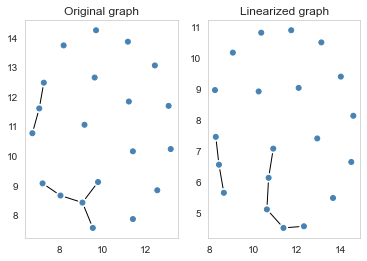

In [31]:
n=20
c=0.4
g = ig.Graph.Erdos_Renyi(n, p=c / n)

def linearize_graph(g):
    component_sizes = [len(c) for c in g.components(mode="WEAK")]
    new_graph = ig.Graph(directed=False)

    # Compute the total number of vertices needed
    total_vertices = sum(component_sizes)

    # Add the vertices to the new graph
    new_graph.add_vertices(total_vertices)

    # Initialize the starting vertex index
    start_vertex = 0

    # Create disjoint linear chains based on component sizes
    for size in component_sizes:
        # Compute the ending vertex index for the current chain
        end_vertex = start_vertex + size - 1

        # Add edges between vertices to form a linear chain
        edges = [(i, i + 1) for i in range(start_vertex, end_vertex)]
        new_graph.add_edges(edges)

        # Update the start vertex for the next chain
        start_vertex = end_vertex +1
    return new_graph

plt.subplot(121)
ig.plot(g, target=plt.gca())
plt.title('Original graph')
plt.grid()
plt.subplot(122)
plt.title('Linearized graph')
ig.plot(linearize_graph(g), target=plt.gca())
plt.grid()

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

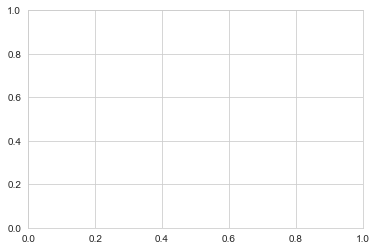

In [8]:
n=10
c=0.4
g = ig.Graph.Erdos_Renyi(n, p=c / n)
steps = 20
connected_nodes = [node for node, degree in enumerate(g.degree()) if degree > 0]
probs = [mkv.get_probabilities(g, node, steps) for node in connected_nodes]
x = range(2, steps+1)[0::2]
y = [mean(list(x)) for x in zip(*probs)][0::2]
plt.plot(x,y, 'bo')
plt.show()

<AxesSubplot:>

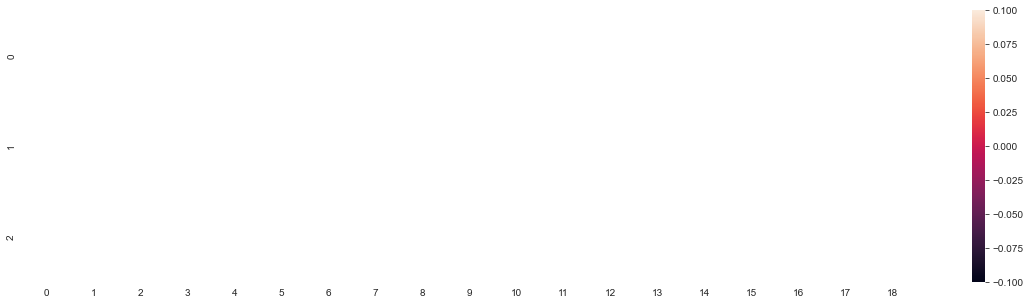

In [142]:
steps = 20
plt.figure(figsize=(20, 5))
probs = []
for i in range(n):
    probs.append(mkv.get_probabilities(g, i, steps))

sns.heatmap(sorted(probs, key=lambda x: x[0]))
# z = zip(*probs)
# avg_prob = [mean(p) for p in z]
# plt.scatter(range(2, steps+1), avg_prob)

In [29]:
sorted(list(enumerate(probs)), key = lambda x: x[1][0])

[(38,
  [0.14285714285714285,
   0.0,
   0.03673469387755102,
   0.0,
   0.018910160889752725,
   4.5351473922899954e-05,
   0.012396100207089644,
   0.00036987396369483894,
   0.009127803699214149,
   0.0006783023133659916,
   0.0072385808129286355,
   0.000916746406857849,
   0.0060386491840361545,
   0.0010943754094082103,
   0.005216647917532319,
   0.0012277985470167951,
   0.004617894573047898,
   0.0013301548532383967,
   0.7511997230141996]),
 (48,
  [0.16666666666666666,
   0.0,
   0.03796296296296295,
   0.0,
   0.019175411522633745,
   0.0003858024691358042,
   0.012300423811156841,
   0.0008693072702331828,
   0.008827850044556662,
   0.0012273398822508497,
   0.006794966686422155,
   0.0014663900823970732,
   0.00549527343755124,
   0.001621268957899935,
   0.004611940801723391,
   0.0017195865227003226,
   0.003983555573393416,
   0.0017800857502227596,
   0.725111167558093]),
 (73,
  [0.16666666666666666,
   0.0,
   0.03217592592592591,
   0.0,
   0.01618762860082304,
  

In [ ]:
steps = 150
plt.figure(figsize=(20, 5))
plt.bar(range(2, steps+1), mkv.get_probabilities(g, 60, steps))

In [4]:
samples = 100000
lengths = []
for _ in range(samples):
    l = len(random_walk(g, 22))
    if l > 150:
        l = 150
    lengths.append(l)

(array([0.     , 0.     , 0.4833 , 0.     , 0.03457, 0.     , 0.01498,
        0.00081, 0.00868, 0.00112, 0.00543, 0.00146, 0.00398, 0.00169,
        0.00327, 0.00152, 0.00289, 0.00183, 0.00265, 0.00201, 0.00325,
        0.00169, 0.00201, 0.00152, 0.00193, 0.00202, 0.00194, 0.00184,
        0.0017 , 0.00153, 0.00203, 0.00159, 0.00194, 0.00188, 0.00164,
        0.00183, 0.00189, 0.00161, 0.00171, 0.00147, 0.00168, 0.00179,
        0.00172, 0.00169, 0.00184, 0.00158, 0.00164, 0.0016 , 0.00165,
        0.00166, 0.00168, 0.00169, 0.00158, 0.00156, 0.00146, 0.00169,
        0.00158, 0.00146, 0.00186, 0.00153, 0.00151, 0.00153, 0.0014 ,
        0.00137, 0.00145, 0.0015 , 0.0013 , 0.00151, 0.00165, 0.00148,
        0.0015 , 0.00149, 0.0015 , 0.00148, 0.00139, 0.00163, 0.00164,
        0.00147, 0.00148, 0.00143, 0.00152, 0.00156, 0.00134, 0.00169,
        0.00123, 0.00141, 0.0016 , 0.00171, 0.00147, 0.00137, 0.00148,
        0.00113, 0.00143, 0.00123, 0.0014 , 0.00115, 0.00143, 0.00124,
      

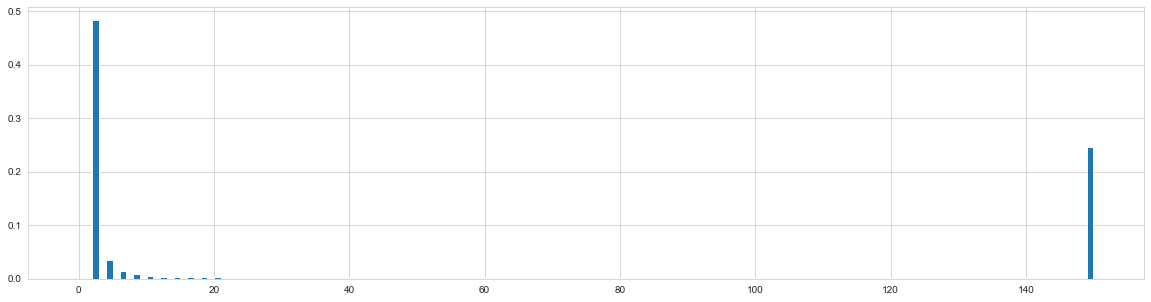

In [5]:
plt.figure(figsize=(20, 5))
plt.hist(lengths, bins=150, range=(0, 150), density=True)

In [ ]:
fig, axes = plt.subplots(np.ceil(n / 5).astype(int), 5, figsize=(20, np.ceil(n / 5).astype(int) * 4))
for start_index in range(n):
    initial_state = get_initial_state(n, start_index)
    T = get_transition_matrix(g)
    step_one_state = initial_state @ T
    T[start_index] = initial_state
    steps = range(2, n)
    probabilities = []
    current_state = step_one_state
    for step in steps:
        current_state = current_state @ T
        step_probability = current_state[start_index] - sum(probabilities)
        probabilities.append(step_probability)
    ax = axes.flat[start_index]
    ax.bar(steps, probabilities)
    ax.set_title(
        f'start: {start_index}, core: {g.shell_index(mode="OUT")[start_index]}, degree: {g.outdegree()[start_index]}')
    ax.set_ylim(0, 1)

In [55]:
dff = pd.read_csv('./data/dist.csv')

,Unnamed: 0,c,walk_length,p,type
0,0,0.1,2,0.952954,matrices
1,1,0.1,3,0.000000,matrices
2,2,0.1,4,0.022165,matrices
3,3,0.1,5,0.000000,matrices
4,4,0.1,6,0.011430,matrices
...,...,...,...,...,...
128,128,2.0,15,0.000160,actual walk
129,129,2.0,16,0.006995,actual walk
130,130,2.0,17,0.000150,actual walk
131,131,2.0,18,0.005770,actual walk


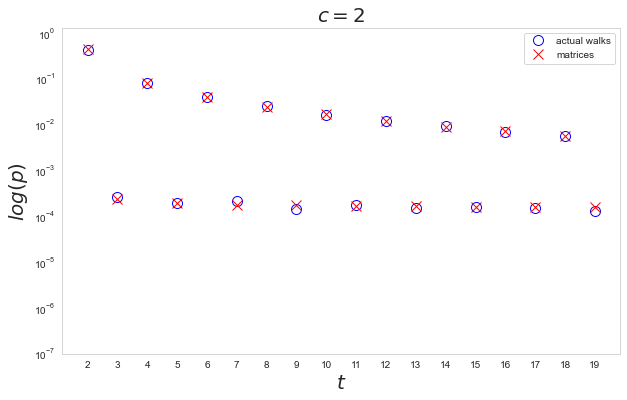

In [60]:
c = 2
plt.figure(figsize=(10, 6))
plt.title(f'$c = {c}$', fontsize=20)
filtered_df = dff[dff['c'] == c]
# filtered_df
plt.plot(filtered_df[filtered_df['type'] == 'actual walk']['walk_length'], filtered_df[filtered_df['type'] == 'actual walk']['p'], 'ob', markerfacecolor='none', markersize=10, label='actual walks')
plt.plot(filtered_df[filtered_df['type'] == 'matrices']['walk_length'], filtered_df[filtered_df['type'] == 'matrices']['p'], 'xr', label='matrices', markersize=10)
plt.ylim(10**(-7), 1.3)
plt.grid()
plt.legend()
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$log(p)$', fontsize=20)
plt.xticks(range(2, 20))
plt.yscale('log')
plt.show()